In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, \
    BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [62]:
data_dir = 'agriculture-crops'
df = pd.read_csv('mbajk_dataset.csv')
data_dir_2 = 'shapes'
df_2 = pd.read_csv('bike_data.csv')

In [63]:
df.head()

,Unnamed: 0,date,temperature,relative_humidity,dew_point,apparent_temperature,precipitation_probability,rain,surface_pressure,bike_stands,available_bike_stands
0,0,2023-06-25 19:07:30+00:00,25.1,45,12.4,24.7,0.0,0.0,984.3,22,8
1,1,2023-06-25 20:25:41+00:00,24.2,43,10.9,23.3,NaN,0.0,984.5,22,8
2,2,2023-06-25 20:12:20+00:00,24.2,43,10.9,23.3,0.0,0.0,984.5,22,12
3,3,2023-06-25 19:33:48+00:00,24.2,43,10.9,23.3,0.0,0.0,984.5,22,7
4,4,2023-06-25 19:55:29+00:00,24.2,43,10.9,23.3,NaN,0.0,984.5,22,8


In [64]:
df_2.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,work_hours
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [65]:
df.isnull().sum()

Unnamed: 0                      0
date                            0
temperature                  1869
relative_humidity               0
dew_point                       0
apparent_temperature            0
precipitation_probability    1308
rain                         2804
surface_pressure                0
bike_stands                     0
available_bike_stands           0
dtype: int64

In [66]:
df_2.isnull().sum()

date                      0
rented_bike_count         0
hour                      0
temperature               0
humidity                  0
wind_speed                0
visibility                0
dew_point_temperature    86
solar_radiation           0
rainfall                  0
snowfall                  0
seasons                   0
holiday                   0
work_hours                0
dtype: int64

In [67]:
df['temperature'].fillna(df['temperature'].mean(), inplace=True)
df['precipitation_probability'].fillna(df['precipitation_probability'].mean(), inplace=True)
df['rain'].fillna(df['rain'].mean(), inplace=True)
df.isnull().sum()

Unnamed: 0                   0
date                         0
temperature                  0
relative_humidity            0
dew_point                    0
apparent_temperature         0
precipitation_probability    0
rain                         0
surface_pressure             0
bike_stands                  0
available_bike_stands        0
dtype: int64

In [68]:
df_2['dew_point_temperature'].fillna(df_2['dew_point_temperature'].mean(), inplace=True)
df_2.isnull().sum()

date                     0
rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
work_hours               0
dtype: int64

In [69]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [70]:
df['day'] = pd.DatetimeIndex(df['date'], dayfirst=True).day
df['month'] = pd.DatetimeIndex(df['date'], dayfirst=True).month
df['year'] = pd.DatetimeIndex(df['date'], dayfirst=True).year

df.drop('date', axis=1, inplace=True)
df.head()

,temperature,relative_humidity,dew_point,apparent_temperature,precipitation_probability,rain,surface_pressure,bike_stands,available_bike_stands,day,month,year
0,25.1,45,12.4,24.7,0.000000,0.0,984.3,22,8,25,6,2023
1,24.2,43,10.9,23.3,20.173608,0.0,984.5,22,8,25,6,2023
2,24.2,43,10.9,23.3,0.000000,0.0,984.5,22,12,25,6,2023
3,24.2,43,10.9,23.3,0.000000,0.0,984.5,22,7,25,6,2023
4,24.2,43,10.9,23.3,20.173608,0.0,984.5,22,8,25,6,2023


In [71]:
df_2['day'] = pd.DatetimeIndex(df_2['date'], dayfirst=True).day
df_2['month'] = pd.DatetimeIndex(df_2['date'], dayfirst=True).month
df_2['year'] = pd.DatetimeIndex(df_2['date'], dayfirst=True).year

df_2.drop('date', axis=1, inplace=True)
df_2 = pd.get_dummies(df_2)
df_2.head()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,...,month,year,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,work_hours_No,work_hours_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,2017,False,False,False,True,False,True,False,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,2017,False,False,False,True,False,True,False,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,2017,False,False,False,True,False,True,False,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,2017,False,False,False,True,False,True,False,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,2017,False,False,False,True,False,True,False,True


In [72]:
image_paths = []
labels = []

for category in os.listdir(data_dir):
    category_dir = os.path.join(data_dir, category)
    for image_file in os.listdir(category_dir):
        if image_file.endswith(".jpg"):
            image_path = os.path.join(category_dir, image_file)
            image_paths.append(image_path)
            labels.append(category)
            
print("Found {} images".format(len(image_paths)))
print("Classes: {}".format(np.unique(labels)))

Found 747 images
Classes: ['almond' 'banana' 'cardamom' 'cherry' 'chilli' 'clove' 'coconut'
 'coffee_plant' 'cotton' 'cucumber' 'fox_nut-makhana' 'gram' 'jowar'
 'jute' 'lemon' 'maize' 'mustard_oil' 'olive_tree' 'papaya'
 'pearl_millet-bajra' 'pineapple' 'rice' 'soyabean' 'sugarcane'
 'sunflower' 'tea' 'tobacco_plant' 'tomato' 'vigna_radiati-mung' 'wheat']


In [73]:
image_paths_2 = []
labels_2 = []

for category in os.listdir(data_dir_2):
    category_dir = os.path.join(data_dir_2, category)
    for image_file in os.listdir(category_dir):
        if image_file.endswith(".png"):
            image_path = os.path.join(category_dir, image_file)
            image_paths_2.append(image_path)
            labels_2.append(category)
            
print("Found {} images".format(len(image_paths_2)))
print("Classes: {}".format(np.unique(labels_2)))

Found 300 images
Classes: ['circles' 'squares' 'triangles']


Category: clove


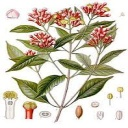

Category: vigna_radiati-mung


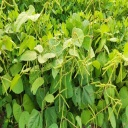

Category: tobacco_plant


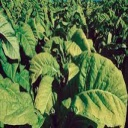

Category: jute


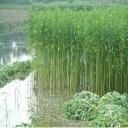

Category: pearl_millet-bajra


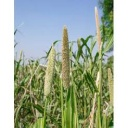

Category: coffee_plant


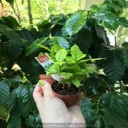

Category: cardamom


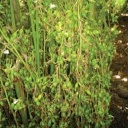

Category: cherry


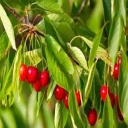

Category: olive_tree


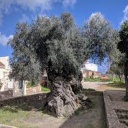

Category: lemon


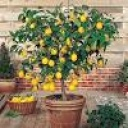

Category: tomato


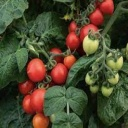

Category: almond


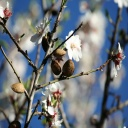

Category: sugarcane


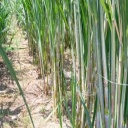

Category: mustard_oil


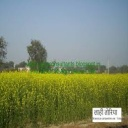

Category: wheat


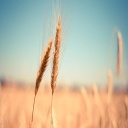

Category: soyabean


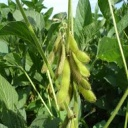

Category: chilli


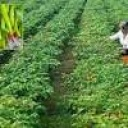

Category: maize


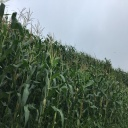

Category: coconut


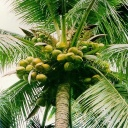

Category: papaya


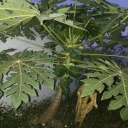

Category: banana


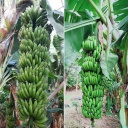

Category: pineapple


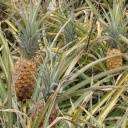

Category: cotton


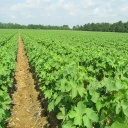

Category: jowar


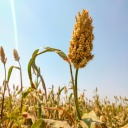

Category: fox_nut-makhana


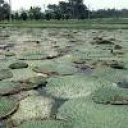

Category: cucumber


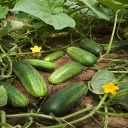

Category: tea


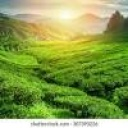

Category: sunflower


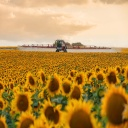

Category: gram


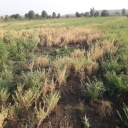

Category: rice


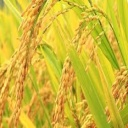

In [74]:
for category in set(labels):
    print('Category:', category)
    category_images = [image_paths[i] for i in range(len(labels)) if labels[i] == category]
    for image_path in category_images[:1]:
        img = Image.open(image_path)
        display(img)

In [75]:
for category in set(labels_2):
    print('Category:', category)
    category_images = [image_paths_2[i] for i in range(len(labels_2)) if labels_2[i] == category]
    for image_path in category_images[:1]:
        img = Image.open(image_path)
        display(img)

Category: triangles


Category: circles


Category: squares


In [76]:
# images = [np.array(Image.open(image_path).convert('L')) for image_path in image_paths]
# images = [image.flatten() for image in images]
# images = np.array(images)

images = []

for folder in os.listdir(data_dir):
    for file in os.listdir(os.path.join(data_dir, folder)):
        image = Image.open(os.path.join(data_dir, folder, file))

        new_width = image.width // 10
        new_height = image.height // 10

        resized_image = image.resize((new_width, new_height), Image.LANCZOS)

        image = resized_image.convert('L')

        image = np.array(image).flatten()

        images.append(image)

In [77]:
images_2 = [np.array(Image.open(image_path).convert('L')) for image_path in image_paths_2]
images_2 = [image.flatten() for image in images_2]
images_2 = np.array(images_2)

In [78]:
regressors = [RandomForestRegressor(random_state=1234), BaggingRegressor(random_state=1234), AdaBoostRegressor(random_state=1234), GradientBoostingRegressor(random_state=1234)]
classifiers = [BaggingClassifier(random_state=1234), RandomForestClassifier(random_state=1234), AdaBoostClassifier(random_state=1234), GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1234)]

In [79]:
input_data = df.columns.tolist()
output_data = 'available_bike_stands'
input_data.remove(output_data)

X = df[input_data]
y = df[output_data]
print(X)
print(y)

       temperature  relative_humidity  dew_point  apparent_temperature  \
0             25.1                 45       12.4                  24.7   
1             24.2                 43       10.9                  23.3   
2             24.2                 43       10.9                  23.3   
3             24.2                 43       10.9                  23.3   
4             24.2                 43       10.9                  23.3   
...            ...                ...        ...                   ...   
18687         26.1                 56       16.7                  27.8   
18688         26.1                 56       16.7                  27.8   
18689         26.1                 56       16.7                  27.8   
18690         26.5                 54       16.4                  28.1   
18691         26.5                 54       16.4                  28.1   

       precipitation_probability      rain  surface_pressure  bike_stands  \
0                       0.000000  

In [80]:
input_data_2 = df_2.columns.tolist()
output_data_2 = 'rented_bike_count'
input_data_2.remove(output_data_2)

X_2 = df_2[input_data_2]
y_2 = df_2[output_data_2]
print(X_2)
print(y_2)

      hour  temperature  humidity  wind_speed  visibility  \
0        0         -5.2        37         2.2        2000   
1        1         -5.5        38         0.8        2000   
2        2         -6.0        39         1.0        2000   
3        3         -6.2        40         0.9        2000   
4        4         -6.0        36         2.3        2000   
...    ...          ...       ...         ...         ...   
8755    19          4.2        34         2.6        1894   
8756    20          3.4        37         2.3        2000   
8757    21          2.6        39         0.3        1968   
8758    22          2.1        41         1.0        1859   
8759    23          1.9        43         1.3        1909   

      dew_point_temperature  solar_radiation  rainfall  snowfall  day  month  \
0                     -17.6              0.0       0.0       0.0    1     12   
1                     -17.6              0.0       0.0       0.0    1     12   
2                     -17.7

In [81]:
X_clf = images
y_clf = np.array(labels)

In [82]:
X_clf_2 = images_2
y_clf_2 = np.array(labels_2)

In [83]:
# skf = StratifiedKFold(n_splits=5)
kf = KFold(n_splits=5, shuffle=True, random_state=1234)

In [84]:
results = {regressor.__class__.__name__: {'MAE': [], 'MSE': [], 'Explained Variance': []} for regressor in regressors}

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for regressor in regressors:
        reg = regressor.__class__.__name__

        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        ev = explained_variance_score(y_test, y_pred)

        results[reg]['MAE'].append(mae)
        results[reg]['MSE'].append(mse)
        results[reg]['Explained Variance'].append(ev)
        
print(results)

{'RandomForestRegressor': {'MAE': [1.2023948315096549, 1.2216083749715383, 1.2112345845995232, 1.2511388269301282, 1.2017407981516222], 'MSE': [3.1323485671845415, 3.27236719947395, 3.2651020044645107, 3.483875233416755, 3.1749104821819247], 'Explained Variance': [0.9257645829101203, 0.9237619369811958, 0.9251506503749086, 0.9170865984023181, 0.9261821768414396]}, 'BaggingRegressor': {'MAE': [1.230953366306109, 1.258017005738538, 1.2301306464728052, 1.2852080287798684, 1.2429409981060526], 'MSE': [3.2715132138244627, 3.5255444296372844, 3.405351928106318, 3.7369074446677595, 3.3964482122544086], 'Explained Variance': [0.9224586607614091, 0.9178620426750927, 0.9219422703301517, 0.9110780920345122, 0.9210508544491663]}, 'AdaBoostRegressor': {'MAE': [5.195005805993487, 5.251685716772639, 5.2870949447951645, 5.187870496261041, 5.289130672495863], 'MSE': [37.8008872946971, 38.91643435610159, 39.159905741854956, 37.908516596317874, 38.759364127012624], 'Explained Variance': [0.10988352259854

In [85]:
avg_reg_results = {}
for model_name, model_scores in results.items():
    print(model_name, ':')
    avg_reg_results[model_name] = {}
    for metric, scores in model_scores.items():
        print(' ', metric, np.mean(scores))
        avg_reg_results[model_name][metric] = np.mean(scores)

RandomForestRegressor :
  MAE 1.2176234832324933
  MSE 3.2657206973443365
  Explained Variance 0.9235891891019964
BaggingRegressor :
  MAE 1.2494500090806746
  MSE 3.4671530456980464
  Explained Variance 0.9188783840500665
AdaBoostRegressor :
  MAE 5.242157527263639
  MSE 38.50902162319683
  Explained Variance 0.10597074800416802
GradientBoostingRegressor :
  MAE 4.334194757763897
  MSE 28.33771233793155
  Explained Variance 0.33711690851348947


In [86]:
results_2 = {regressor.__class__.__name__: {'MAE': [], 'MSE': [], 'Explained Variance': []} for regressor in regressors}

for train_index, test_index in kf.split(X_2):
    X_train, X_test = X_2.iloc[train_index], X_2.iloc[test_index]
    y_train, y_test = y_2.iloc[train_index], y_2.iloc[test_index]


    for regressor in regressors:
        reg = regressor.__class__.__name__

        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        ev = explained_variance_score(y_test, y_pred)

        results_2[reg]['MAE'].append(mae)
        results_2[reg]['MSE'].append(mse)
        results_2[reg]['Explained Variance'].append(ev)
        
print(results_2)

{'RandomForestRegressor': {'MAE': [133.41280251141552, 126.12818493150687, 131.30838470319637, 143.6303196347032, 126.8186815068493], 'MSE': [48025.29951946347, 45242.61521541096, 51417.1199841895, 55456.21932945205, 43218.05469377854], 'Explained Variance': [0.8913535890676646, 0.8926773646034926, 0.8723969772578282, 0.8611722838416407, 0.8965643999709022]}, 'BaggingRegressor': {'MAE': [140.73521689497719, 131.38173515981734, 137.29571917808218, 151.53778538812787, 132.510502283105], 'MSE': [55301.8143436073, 49904.859486301364, 56220.456649543376, 64866.65265981736, 47849.397922374425], 'Explained Variance': [0.874954038586697, 0.8816136891257054, 0.8604795639580378, 0.8377915660610916, 0.8856983455089809]}, 'AdaBoostRegressor': {'MAE': [364.25904123524293, 380.7155075791901, 355.9791647137504, 359.72297406763573, 361.68837561706744], 'MSE': [178711.60435588867, 191041.31829070195, 175317.31287237813, 182350.86594093908, 174142.10166942477], 'Explained Variance': [0.6840669205851575,

In [87]:
avg_reg_results_2 = {}
for model_name, model_scores in results_2.items():
    print(model_name, ':')
    avg_reg_results_2[model_name] = {}
    for metric, scores in model_scores.items():
        print(' ', metric, np.mean(scores))
        avg_reg_results_2[model_name][metric] = np.mean(scores)

RandomForestRegressor :
  MAE 132.25967465753425
  MSE 48671.861748458905
  Explained Variance 0.8828329229483056
BaggingRegressor :
  MAE 138.69219178082193
  MSE 54828.63621232876
  Explained Variance 0.8681074406481025
AdaBoostRegressor :
  MAE 364.4730126425773
  MSE 180312.64062586654
  Explained Variance 0.6737810667298374
GradientBoostingRegressor :
  MAE 167.51893172761612
  MSE 63137.93438209522
  Explained Variance 0.8480626906777674


In [88]:
results_clf_2 = {classifier.__class__.__name__: {'Accuracy': [], 'F1 Weighted': [], 'Precision Weighted': [], 'Recall Weighted': []} for classifier in classifiers}

for train_index, test_index in kf.split(X_clf_2, y_clf_2):
    X_train, X_test = X_clf_2[train_index], X_clf_2[test_index]
    y_train, y_test = y_clf_2[train_index], y_clf_2[test_index]


    for classifier in classifiers:
        clf = classifier.__class__.__name__

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        results_clf_2[clf]['Accuracy'].append(accuracy)
        results_clf_2[clf]['F1 Weighted'].append(f1)
        results_clf_2[clf]['Precision Weighted'].append(precision)
        results_clf_2[clf]['Recall Weighted'].append(recall)
        
print(results_clf_2)

{'BaggingClassifier': {'Accuracy': [0.5166666666666667, 0.45, 0.5333333333333333, 0.3333333333333333, 0.45], 'F1 Weighted': [0.5152359622460405, 0.4600162612492203, 0.5333289087992921, 0.32280995280995284, 0.4468542839274547], 'Precision Weighted': [0.5169444444444445, 0.5146666666666667, 0.5349841269841271, 0.3593135657651787, 0.45129248241376385], 'Recall Weighted': [0.5166666666666667, 0.45, 0.5333333333333333, 0.3333333333333333, 0.45]}, 'RandomForestClassifier': {'Accuracy': [0.6, 0.6166666666666667, 0.55, 0.45, 0.5], 'F1 Weighted': [0.5985039470333589, 0.6069851133498624, 0.5453246187363835, 0.4532946486137976, 0.4972614462986735], 'Precision Weighted': [0.6109126984126985, 0.6174999999999999, 0.5461538461538462, 0.49801587301587297, 0.508458419599724], 'Recall Weighted': [0.6, 0.6166666666666667, 0.55, 0.45, 0.5]}, 'AdaBoostClassifier': {'Accuracy': [0.4, 0.4666666666666667, 0.4666666666666667, 0.25, 0.31666666666666665], 'F1 Weighted': [0.3906736353077817, 0.46903245732255167, 

In [89]:
avg_clf_results_2 = {}
for model_name, model_scores in results_clf_2.items():
    print(model_name, ':')
    avg_clf_results_2[model_name] = {}
    for metric, scores in model_scores.items():
        print(' ', metric, np.mean(scores))
        avg_clf_results_2[model_name][metric] = np.mean(scores)

BaggingClassifier :
  Accuracy 0.45666666666666667
  F1 Weighted 0.455649073806392
  Precision Weighted 0.47544025725483613
  Recall Weighted 0.45666666666666667
RandomForestClassifier :
  Accuracy 0.5433333333333333
  F1 Weighted 0.540273954806415
  Precision Weighted 0.5562081674364283
  Recall Weighted 0.5433333333333333
AdaBoostClassifier :
  Accuracy 0.38
  F1 Weighted 0.37851166909651723
  Precision Weighted 0.3971794046911694
  Recall Weighted 0.38
GradientBoostingClassifier :
  Accuracy 0.44666666666666666
  F1 Weighted 0.4477909608714241
  Precision Weighted 0.4665835270489554
  Recall Weighted 0.44666666666666666


In [90]:
results_clf = {}
for classifier in classifiers:
    model_name = classifier.__class__.__name__
    clf_scores = {'Accuracy': [], 'F1 Weighted': [], 'Precision Weighted': [], 'Recall Weighted': []}

    for train_index, test_index in kf.split(X_clf, y_clf):
        X_train, X_test = np.array(X_clf)[train_index], np.array(X_clf)[test_index]
        y_train, y_test = np.array(y_clf)[train_index], np.array(y_clf)[test_index]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)

        clf_scores['Accuracy'].append(accuracy)
        clf_scores['F1 Weighted'].append(f1)
        clf_scores['Precision Weighted'].append(precision)
        clf_scores['Recall Weighted'].append(recall)

    results_clf[model_name] = clf_scores

print(results_clf)

{'BaggingClassifier': {'Accuracy': [0.14, 0.16, 0.18120805369127516, 0.21476510067114093, 0.1476510067114094], 'F1 Weighted': [0.1321978217860571, 0.15312707662707664, 0.1632020105174468, 0.20388232200312736, 0.149203093261522], 'Precision Weighted': [0.20122222222222222, 0.253957671957672, 0.23065573501815112, 0.2490332374560563, 0.24872163630552893], 'Recall Weighted': [0.14, 0.16, 0.18120805369127516, 0.21476510067114093, 0.1476510067114094]}, 'RandomForestClassifier': {'Accuracy': [0.15333333333333332, 0.22, 0.2348993288590604, 0.20134228187919462, 0.18120805369127516], 'F1 Weighted': [0.1651117965854808, 0.21472722049192636, 0.2194308003703977, 0.17778530194637576, 0.1666541698420893], 'Precision Weighted': [0.34329629629629627, 0.3337910052910053, 0.31861980301577614, 0.27328752530094813, 0.2748727782284829], 'Recall Weighted': [0.15333333333333332, 0.22, 0.2348993288590604, 0.20134228187919462, 0.18120805369127516]}, 'AdaBoostClassifier': {'Accuracy': [0.02666666666666667, 0.073

In [91]:
maes = {}
mses = {}
evs = {}

for i in results:
    maes[i] = results[i]['MAE']
    mses[i] = results[i]['MSE']
    evs[i] = results[i]['Explained Variance']

([0, 1, 2, 3],
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'BaggingRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

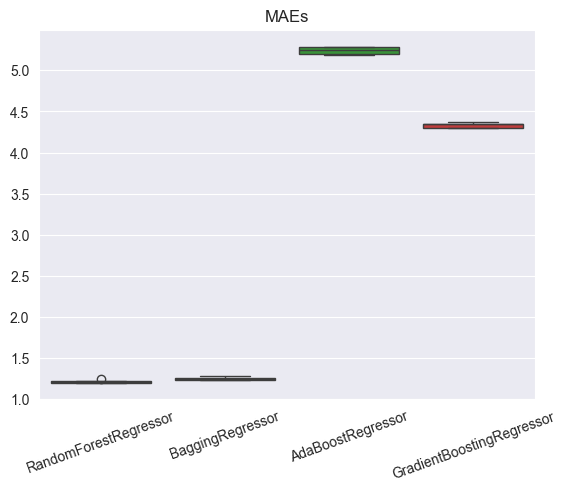

In [92]:
sns.boxplot(data=pd.DataFrame(maes)).set_title('MAEs')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'BaggingRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

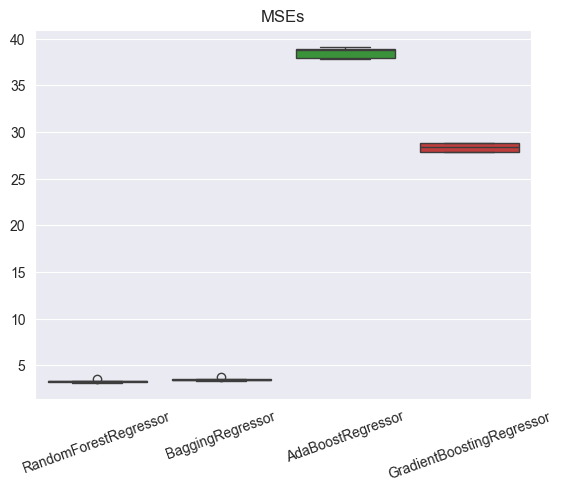

In [93]:
sns.boxplot(data=pd.DataFrame(mses)).set_title('MSEs')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'BaggingRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

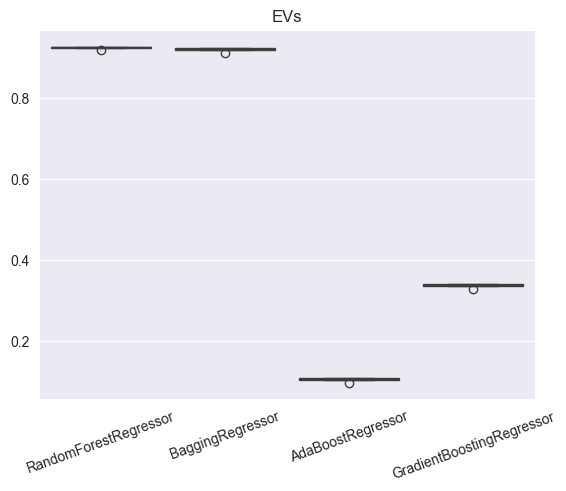

In [94]:
sns.boxplot(data=pd.DataFrame(evs)).set_title('EVs')
plt.xticks(rotation=20)

In [95]:
avg_maes = {}
avg_mses = {}
avg_evs = {}

for i in avg_reg_results:
    avg_maes[i] = avg_reg_results[i]['MAE']
    avg_mses[i] = avg_reg_results[i]['MSE']
    avg_evs[i] = avg_reg_results[i]['Explained Variance']
    
print(avg_maes)
print(avg_mses)
print(avg_evs)

{'RandomForestRegressor': 1.2176234832324933, 'BaggingRegressor': 1.2494500090806746, 'AdaBoostRegressor': 5.242157527263639, 'GradientBoostingRegressor': 4.334194757763897}
{'RandomForestRegressor': 3.2657206973443365, 'BaggingRegressor': 3.4671530456980464, 'AdaBoostRegressor': 38.50902162319683, 'GradientBoostingRegressor': 28.33771233793155}
{'RandomForestRegressor': 0.9235891891019964, 'BaggingRegressor': 0.9188783840500665, 'AdaBoostRegressor': 0.10597074800416802, 'GradientBoostingRegressor': 0.33711690851348947}


([0, 1, 2, 3],
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'BaggingRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

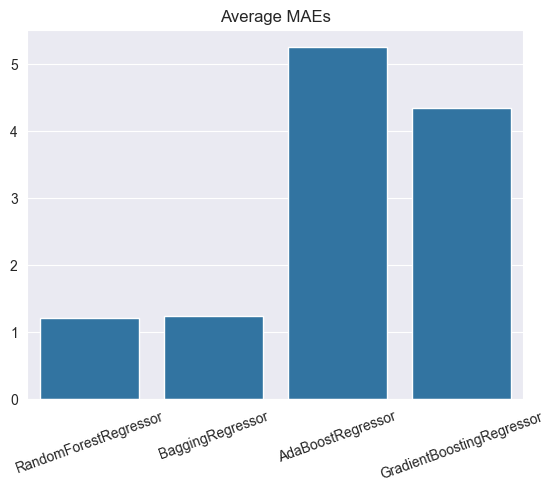

In [96]:
sns.barplot(x=list(avg_maes.keys()), y=list(avg_maes.values())).set_title('Average MAEs')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'BaggingRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

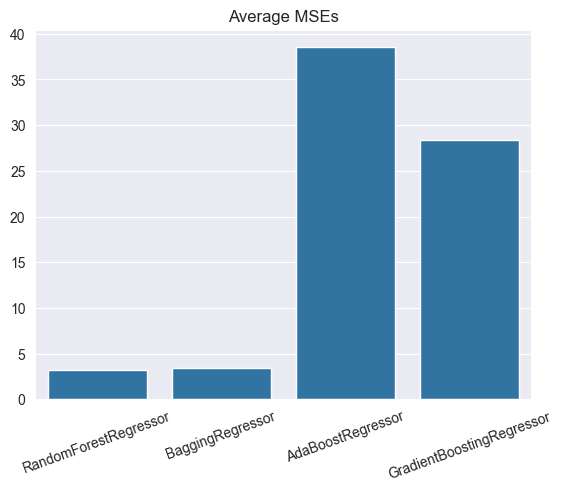

In [97]:
sns.barplot(x=list(avg_mses.keys()), y=list(avg_mses.values())).set_title('Average MSEs')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'BaggingRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

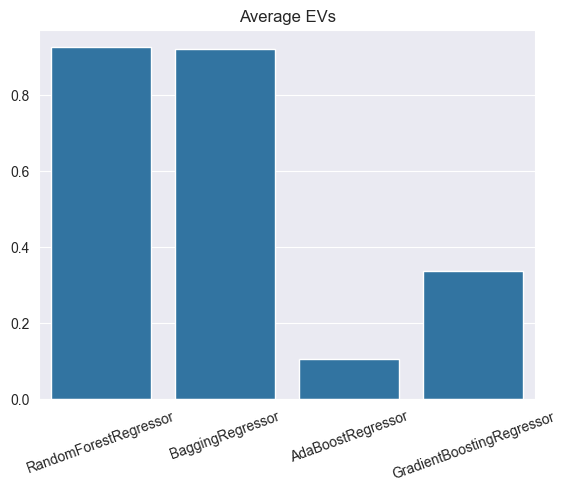

In [98]:
sns.barplot(x=list(avg_evs.keys()), y=list(avg_evs.values())).set_title('Average EVs')
plt.xticks(rotation=20)

In [99]:
maes_2 = {}
mses_2 = {}
evs_2 = {}

for i in results_2:
    maes_2[i] = results_2[i]['MAE']
    mses_2[i] = results_2[i]['MSE']
    evs_2[i] = results_2[i]['Explained Variance']

([0, 1, 2, 3],
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'BaggingRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

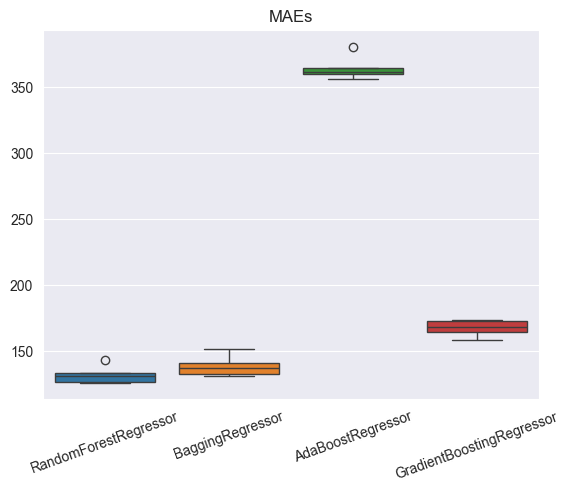

In [100]:
sns.boxplot(data=pd.DataFrame(maes_2)).set_title('MAEs')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'BaggingRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

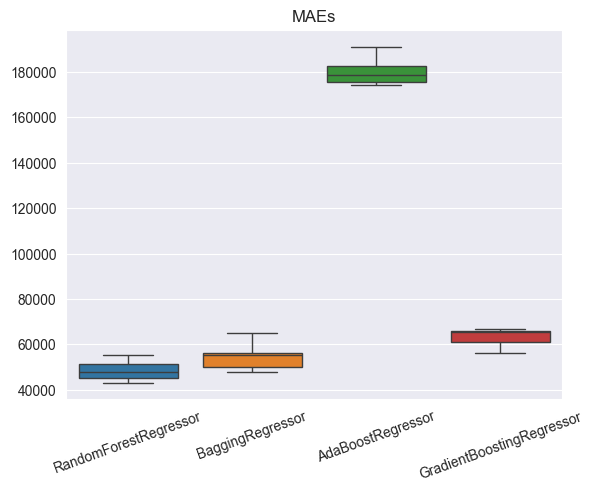

In [101]:
sns.boxplot(data=pd.DataFrame(mses_2)).set_title('MSEs')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'BaggingRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

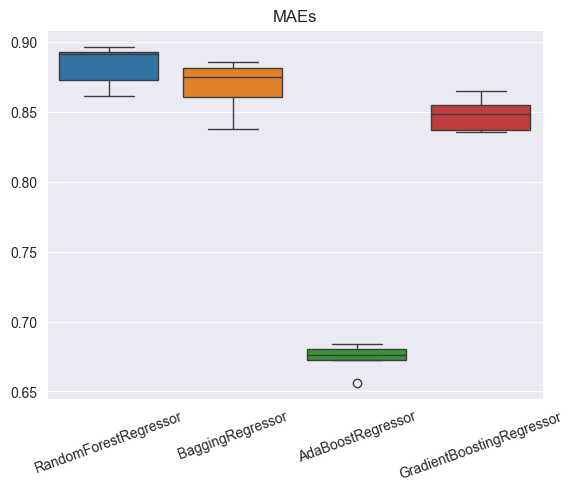

In [102]:
sns.boxplot(data=pd.DataFrame(evs_2)).set_title('EVSs')
plt.xticks(rotation=20)

In [103]:
# priprava podatkov za vsako metriko za posamezen graf
avg_maes_2 = {}
avg_mses_2 = {}
avg_evs_2 = {}

for i in avg_reg_results_2:
    avg_maes_2[i] = avg_reg_results_2[i]['MAE']
    avg_mses_2[i] = avg_reg_results_2[i]['MSE']
    avg_evs_2[i] = avg_reg_results_2[i]['Explained Variance']
    
print(avg_maes_2)
print(avg_mses_2)
print(avg_evs_2)

{'RandomForestRegressor': 132.25967465753425, 'BaggingRegressor': 138.69219178082193, 'AdaBoostRegressor': 364.4730126425773, 'GradientBoostingRegressor': 167.51893172761612}
{'RandomForestRegressor': 48671.861748458905, 'BaggingRegressor': 54828.63621232876, 'AdaBoostRegressor': 180312.64062586654, 'GradientBoostingRegressor': 63137.93438209522}
{'RandomForestRegressor': 0.8828329229483056, 'BaggingRegressor': 0.8681074406481025, 'AdaBoostRegressor': 0.6737810667298374, 'GradientBoostingRegressor': 0.8480626906777674}


([0, 1, 2, 3],
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'BaggingRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

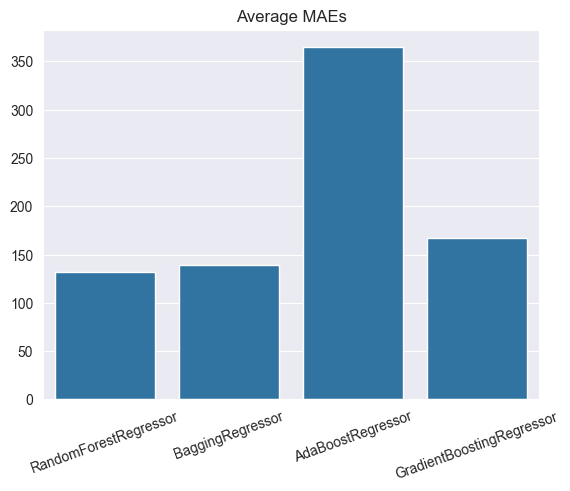

In [104]:
sns.barplot(x=list(avg_maes_2.keys()), y=list(avg_maes_2.values())).set_title('Average MAEs')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'BaggingRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

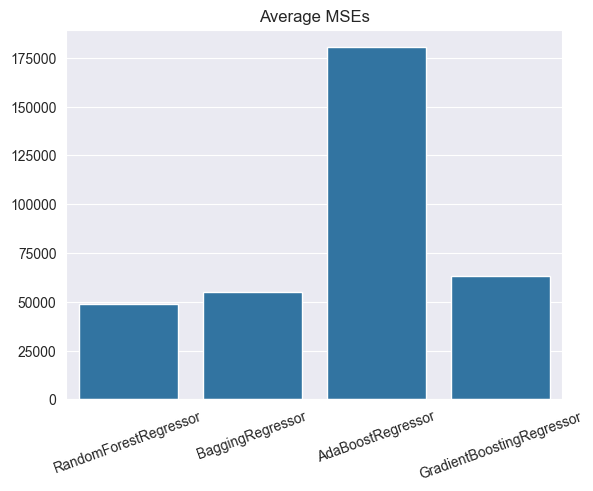

In [105]:
sns.barplot(x=list(avg_mses_2.keys()), y=list(avg_mses_2.values())).set_title('Average MSEs')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'BaggingRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

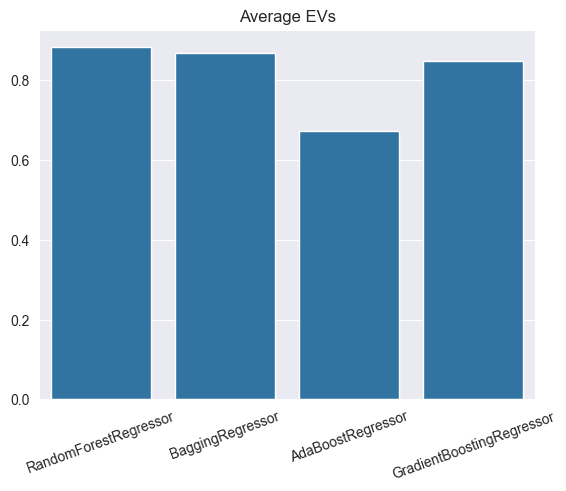

In [106]:
sns.barplot(x=list(avg_evs_2.keys()), y=list(avg_evs_2.values())).set_title('Average EVs')
plt.xticks(rotation=20)

In [107]:
accuracy_2 = {}
f1_2 = {}
precision_2 = {}
recall_2 = {}

for i in results_clf_2:
    accuracy_2[i] = results_clf_2[i]['Accuracy']
    f1_2[i] = results_clf_2[i]['F1 Weighted']
    precision_2[i] = results_clf_2[i]['Precision Weighted']
    recall_2[i] = results_clf_2[i]['Recall Weighted']

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

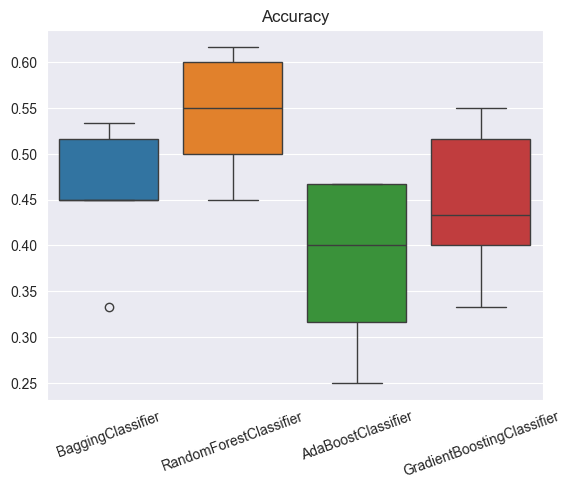

In [108]:
sns.boxplot(data=pd.DataFrame(accuracy_2)).set_title('Accuracy')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

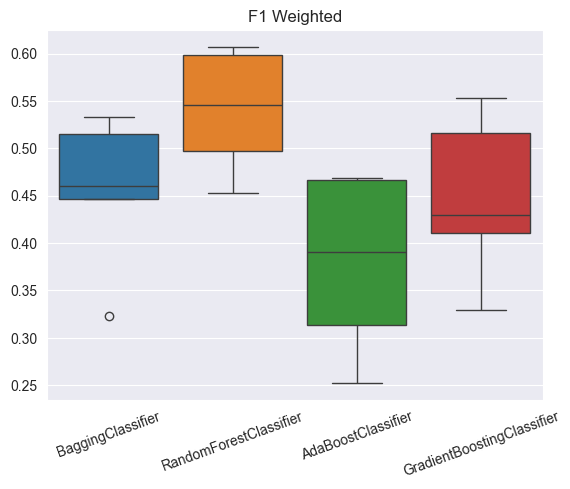

In [109]:
sns.boxplot(data=pd.DataFrame(f1_2)).set_title('F1 Weighted')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

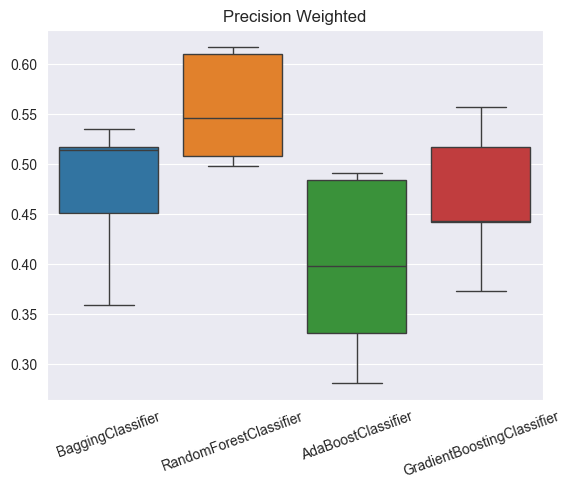

In [110]:
sns.boxplot(data=pd.DataFrame(precision_2)).set_title('Precision Weighted')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

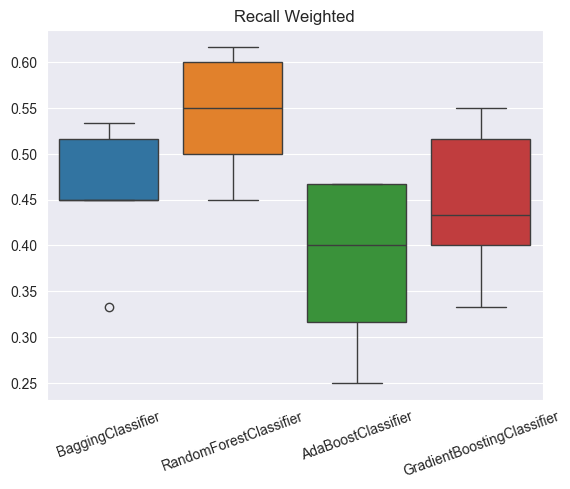

In [111]:
sns.boxplot(data=pd.DataFrame(recall_2)).set_title('Recall Weighted')
plt.xticks(rotation=20)

In [112]:
avg_accuracy_2 = {}
avg_f1_2 = {}
avg_precision_2 = {}
avg_recall_2 = {}

for i in avg_clf_results_2:
    avg_accuracy_2[i] = avg_clf_results_2[i]['Accuracy']
    avg_f1_2[i] = avg_clf_results_2[i]['F1 Weighted']
    avg_precision_2[i] = avg_clf_results_2[i]['Precision Weighted']
    avg_recall_2[i] = avg_clf_results_2[i]['Recall Weighted']

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

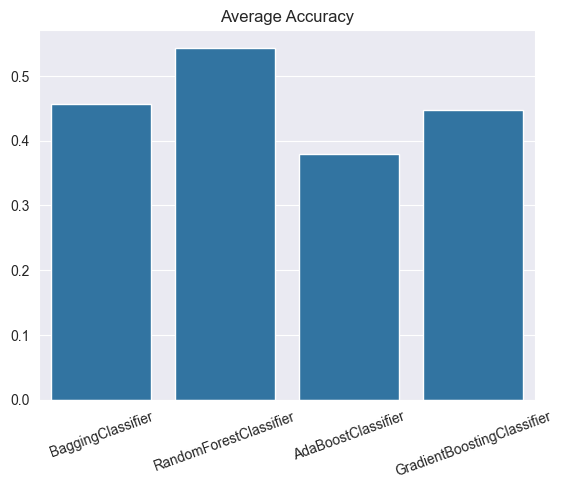

In [113]:
sns.barplot(x=list(avg_accuracy_2.keys()), y=list(avg_accuracy_2.values())).set_title('Average Accuracy')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

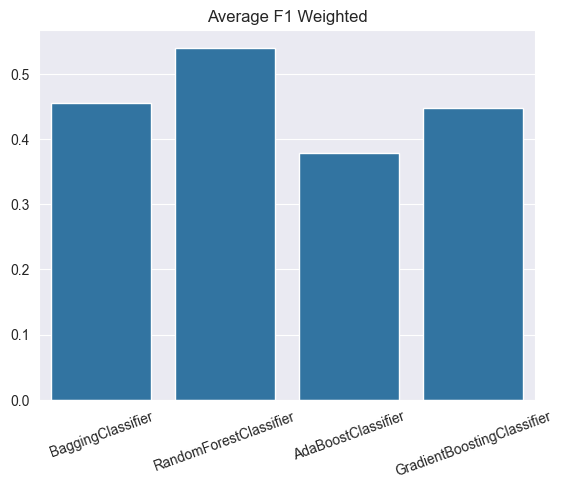

In [114]:
sns.barplot(x=list(avg_f1_2.keys()), y=list(avg_f1_2.values())).set_title('Average F1 Weighted')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

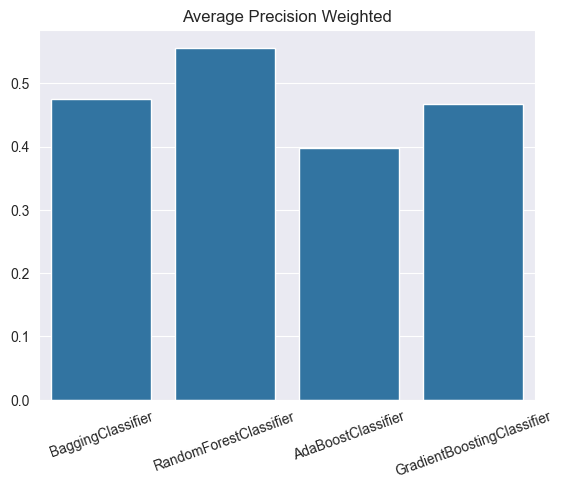

In [115]:
sns.barplot(x=list(avg_precision_2.keys()), y=list(avg_precision_2.values())).set_title('Average Precision Weighted')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

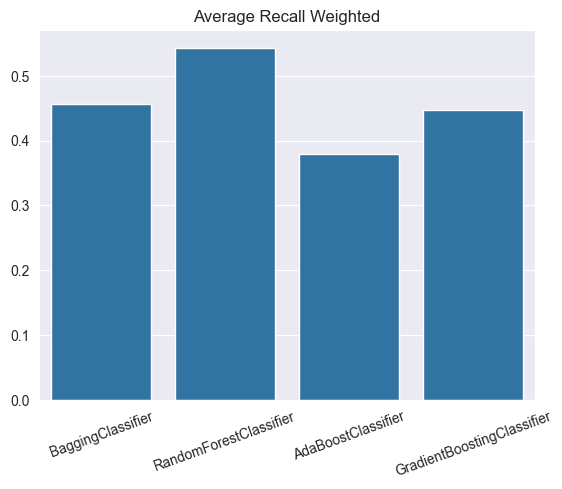

In [116]:
sns.barplot(x=list(avg_recall_2.keys()), y=list(avg_recall_2.values())).set_title('Average Recall Weighted')
plt.xticks(rotation=20)

In [117]:
accuracy = {}
f1 = {}
precision = {}
recall = {}

for i in results_clf:
    accuracy[i] = results_clf[i]['Accuracy']
    f1[i] = results_clf[i]['F1 Weighted']
    precision[i] = results_clf[i]['Precision Weighted']
    recall[i] = results_clf[i]['Recall Weighted']

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

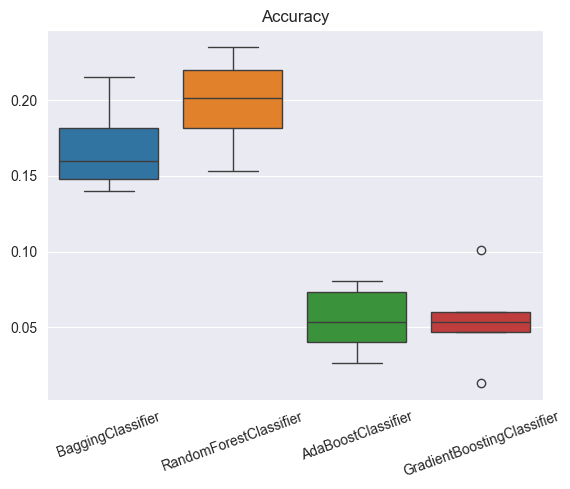

In [118]:
sns.boxplot(data=pd.DataFrame(accuracy)).set_title('Accuracy')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

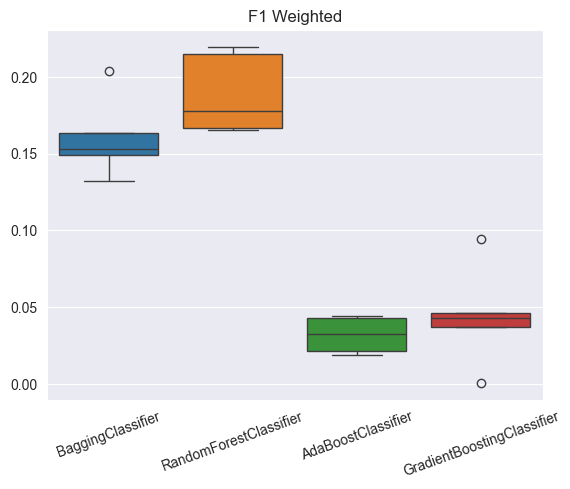

In [119]:
sns.boxplot(data=pd.DataFrame(f1)).set_title('F1 Weighted')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

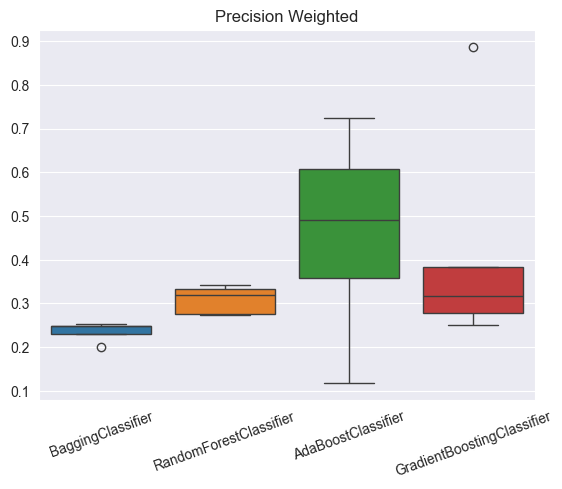

In [120]:
sns.boxplot(data=pd.DataFrame(precision)).set_title('Precision Weighted')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

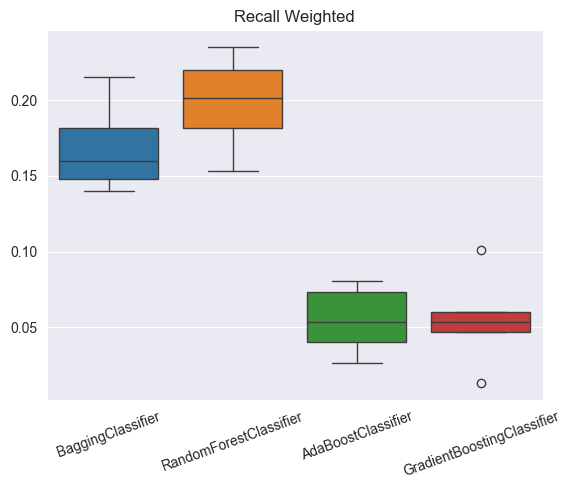

In [121]:
sns.boxplot(data=pd.DataFrame(recall)).set_title('Recall Weighted')
plt.xticks(rotation=20)

In [122]:
avg_clf_results = {}
for model_name, model_scores in results_clf.items():
    print(model_name, ':')
    avg_clf_results[model_name] = {}
    for metric, scores in model_scores.items():
        print(' ', metric, np.mean(scores))
        avg_clf_results[model_name][metric] = np.mean(scores)

BaggingClassifier :
  Accuracy 0.1687248322147651
  F1 Weighted 0.160322464839046
  Precision Weighted 0.23671810059192616
  Recall Weighted 0.1687248322147651
RandomForestClassifier :
  Accuracy 0.19815659955257267
  F1 Weighted 0.188741857847254
  Precision Weighted 0.30877348162650176
  Recall Weighted 0.19815659955257267
AdaBoostClassifier :
  Accuracy 0.0548993288590604
  F1 Weighted 0.03189506156128545
  Precision Weighted 0.4601411781400973
  Recall Weighted 0.0548993288590604
GradientBoostingClassifier :
  Accuracy 0.0549351230425056
  F1 Weighted 0.04410650509292437
  Precision Weighted 0.4234307824437278
  Recall Weighted 0.0549351230425056


In [123]:
avg_accuracy = {}
avg_f1 = {}
avg_precision = {}
avg_recall = {}

for i in avg_clf_results:
    avg_accuracy[i] = avg_clf_results[i]['Accuracy']
    avg_f1[i] = avg_clf_results[i]['F1 Weighted']
    avg_precision[i] = avg_clf_results[i]['Precision Weighted']
    avg_recall[i] = avg_clf_results[i]['Recall Weighted']

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

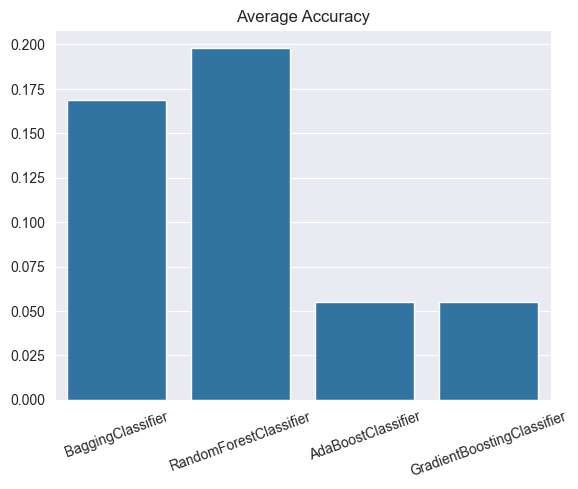

In [124]:
sns.barplot(x=list(avg_accuracy.keys()), y=list(avg_accuracy.values())).set_title('Average Accuracy')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

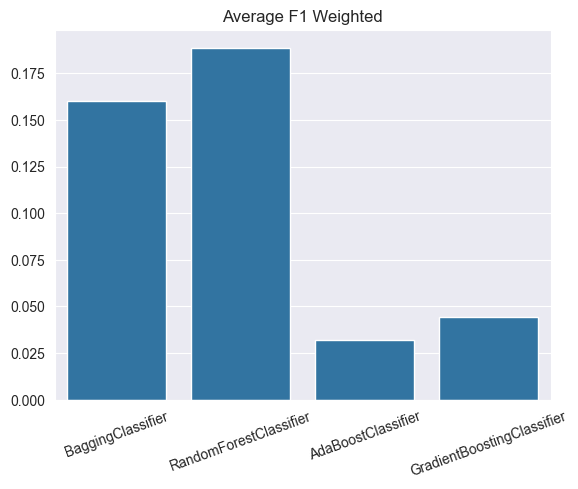

In [125]:
sns.barplot(x=list(avg_f1.keys()), y=list(avg_f1.values())).set_title('Average F1 Weighted')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

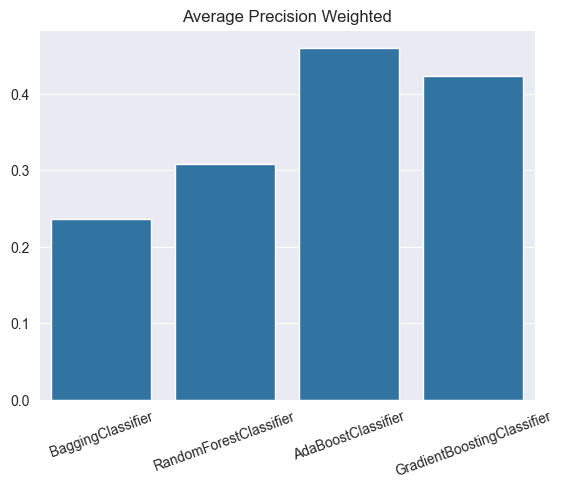

In [126]:
sns.barplot(x=list(avg_precision.keys()), y=list(avg_precision.values())).set_title('Average Precision Weighted')
plt.xticks(rotation=20)

([0, 1, 2, 3],
 [Text(0, 0, 'BaggingClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'AdaBoostClassifier'),
  Text(3, 0, 'GradientBoostingClassifier')])

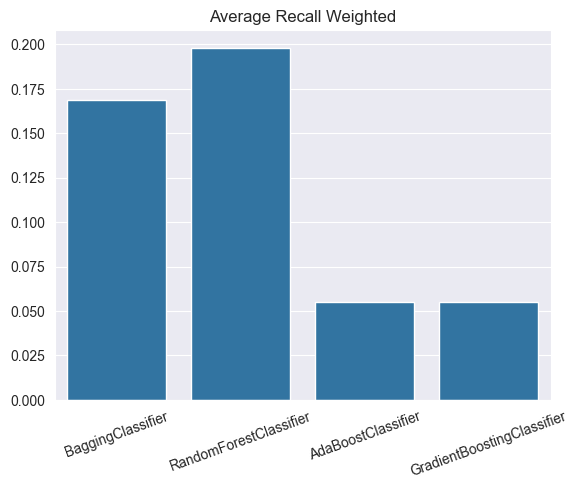

In [127]:
sns.barplot(x=list(avg_recall.keys()), y=list(avg_recall.values())).set_title('Average Recall Weighted')
plt.xticks(rotation=20)